In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('cities_r2.csv')

In [5]:
print("Dataser preview : ")
display(data.head())

Dataser preview : 


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns                                   

In [8]:
if len(categorical_cols) > 0:
    print("Categorical Columns found : ",categorical_cols)
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        data[col] = label_encoder.fit_transform(data[col])
    print("Label Encoding is applied to categorical columns.")

Categorical Columns found :  Index(['name_of_city', 'state_name', 'location'], dtype='object')
Label Encoding is applied to categorical columns.


In [9]:
if data.isnull().sum().sum() > 0 :
    print("Missing values detected, handling with imputation.")
    data = data.fillna(data.mean())

In [10]:
X = data[['effective_literacy_rate_total']]

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

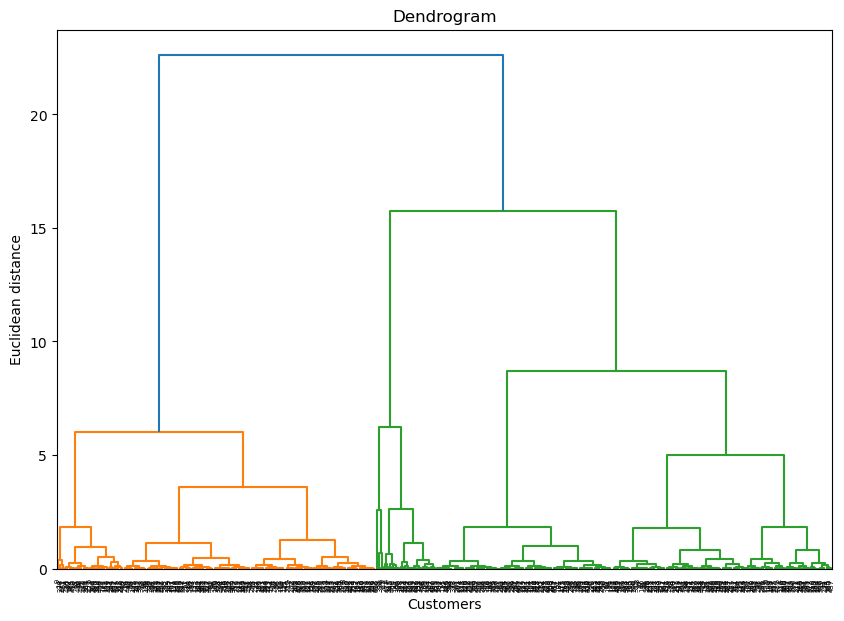

In [12]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.show()

In [14]:
num_clusters = 3
hc = AgglomerativeClustering(n_clusters=num_clusters,metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(X_scaled)

In [15]:
data['Cluster'] = y_hc
print("Data with cluster labels : ")
display(data.head())

Data with cluster labels : 


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,Cluster
0,0,3,22,9,145238,76840,68398,15870,8587,7283,...,890,848,79.86,85.49,73.59,455,16287,8612,7675,0
1,1,27,14,7,112293,58256,54037,11810,6186,5624,...,928,909,91.99,94.77,89.00,154,8863,5269,3594,1
2,2,28,1,1,117388,59232,58156,13103,6731,6372,...,982,947,80.51,88.18,72.73,116,10565,6797,3768,0
3,3,20,10,24,173988,91495,82493,23042,12063,10979,...,902,910,83.46,89.98,76.23,215,19225,12189,7036,0
4,4,28,1,21,166537,82743,83794,18406,9355,9051,...,1013,968,68.38,76.58,60.33,66,11902,7871,4031,2


AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

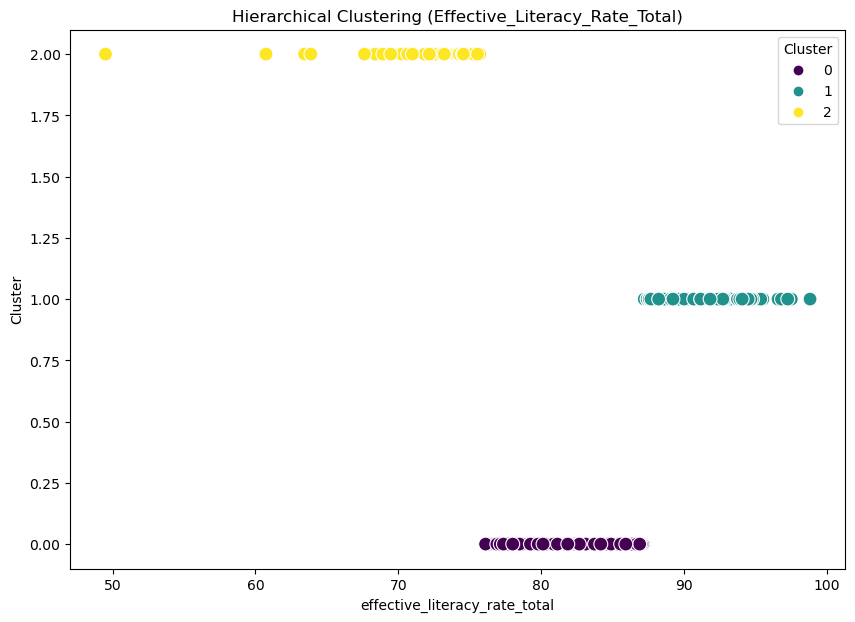

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = data,x='effective_literacy_rate_total',y='Cluster',hue='Cluster',palette='viridis',s=100)
plt.title("Hierarchical Clustering (Effective_Literacy_Rate_Total)")
plt.x_label("Effective Literacy Rate Total")
plt.y_label("Cluster")
plt.show()

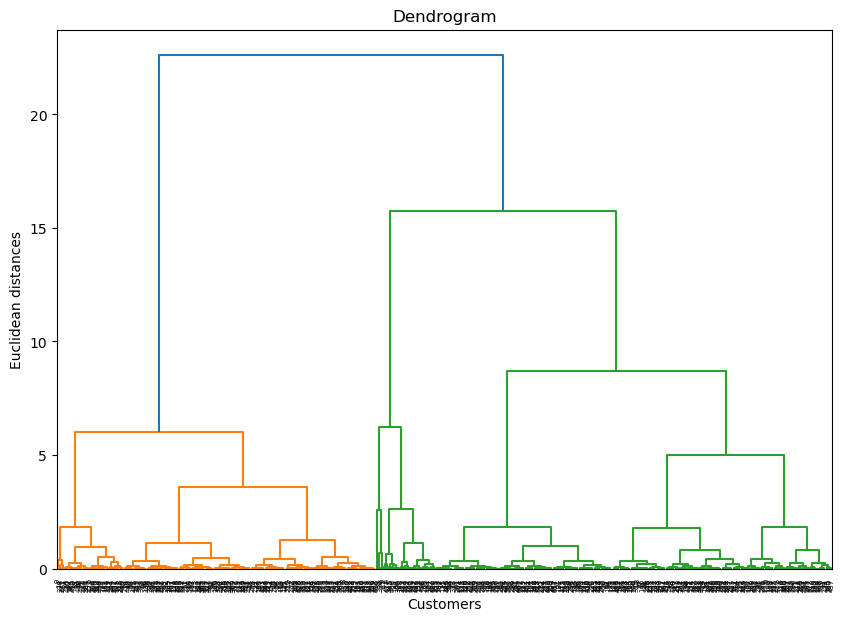

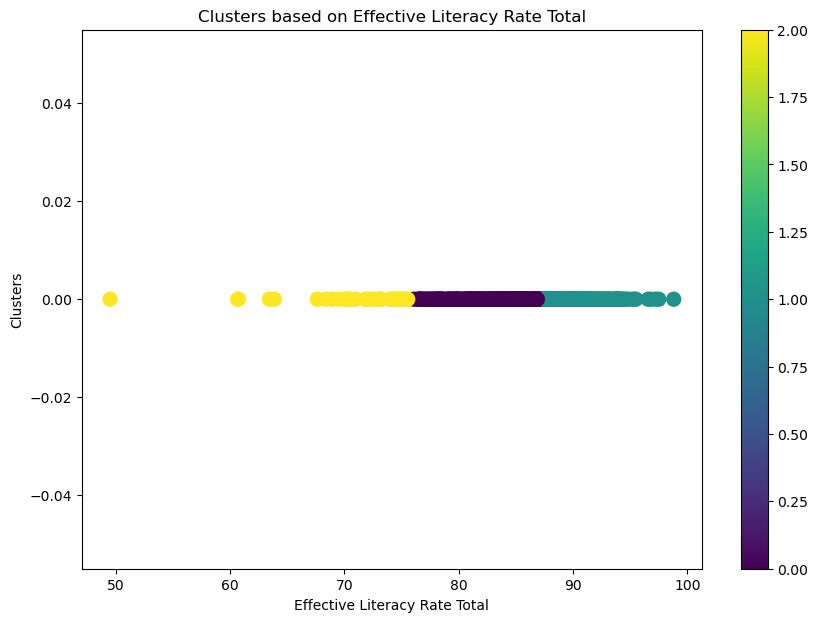

In [18]:
# Plotting Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

# Scatter plot showing the distribution of effective literacy rates by cluster
plt.figure(figsize=(10, 7))
plt.scatter(data['effective_literacy_rate_total'], [0]*len(data), c=data['Cluster'], cmap='viridis', s=100, label='Clusters')
plt.colorbar()
plt.title("Clusters based on Effective Literacy Rate Total")
plt.xlabel("Effective Literacy Rate Total")
plt.ylabel("Clusters")
plt.show()
